In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
data = pd.read_csv('data/ds_salaries.csv', index_col=0)

In [3]:
data

,work_year,experience_level,employment_type,job_title,salary,salary_currency,salary_in_usd,employee_residence,remote_ratio,company_location,company_size
0,2020,MI,FT,Data Scientist,70000,EUR,79833,DE,0,DE,L
1,2020,SE,FT,Machine Learning Scientist,260000,USD,260000,JP,0,JP,S
2,2020,SE,FT,Big Data Engineer,85000,GBP,109024,GB,50,GB,M
3,2020,MI,FT,Product Data Analyst,20000,USD,20000,HN,0,HN,S
4,2020,SE,FT,Machine Learning Engineer,150000,USD,150000,US,50,US,L
...,...,...,...,...,...,...,...,...,...,...,...
602,2022,SE,FT,Data Engineer,154000,USD,154000,US,100,US,M
603,2022,SE,FT,Data Engineer,126000,USD,126000,US,100,US,M
604,2022,SE,FT,Data Analyst,129000,USD,129000,US,0,US,M
605,2022,SE,FT,Data Analyst,150000,USD,150000,US,100,US,M


In [4]:
def df_info(df):
        len_df = len(df)
        all_columns = len(df.columns)
        print(f"""
        Taille du dataset : {df.size}
        Longueur du dataset : {len_df} enregistrements
        Nombre de colonnes : {all_columns}
        """)
        echantillonColonnes = []
        for i in df.columns:
            listcolumn = str(list(df[i].head(5)))
            echantillonColonnes.append(listcolumn)
        pd.set_option("max_rows", None)
        observation = pd.DataFrame({'type': list(df.dtypes),
        'Echantillon': echantillonColonnes,
        "% de valeurs nulles":
        round(df.isna().sum() / len_df * 100, 2),
        'Nbr L dupliquées' : (df.duplicated()).sum(),
        'Nbr V unique' : df.nunique()
        })
        return observation

In [5]:
df_info(data)


        Taille du dataset : 6677
        Longueur du dataset : 607 enregistrements
        Nombre de colonnes : 11
        


,type,Echantillon,% de valeurs nulles,Nbr L dupliquées,Nbr V unique
work_year,int64,"[2020, 2020, 2020, 2020, 2020]",0.0,42,3
experience_level,object,"['MI', 'SE', 'SE', 'MI', 'SE']",0.0,42,4
employment_type,object,"['FT', 'FT', 'FT', 'FT', 'FT']",0.0,42,4
job_title,object,"['Data Scientist', 'Machine Learning Scientist...",0.0,42,50
salary,int64,"[70000, 260000, 85000, 20000, 150000]",0.0,42,272
salary_currency,object,"['EUR', 'USD', 'GBP', 'USD', 'USD']",0.0,42,17
salary_in_usd,int64,"[79833, 260000, 109024, 20000, 150000]",0.0,42,369
employee_residence,object,"['DE', 'JP', 'GB', 'HN', 'US']",0.0,42,57
remote_ratio,int64,"[0, 0, 50, 0, 50]",0.0,42,3
company_location,object,"['DE', 'JP', 'GB', 'HN', 'US']",0.0,42,50


### DROP DUPLICATES AND CHECK UNIQUE VALUES

In [6]:
data = data.drop_duplicates()

In [7]:
df_info(data)


        Taille du dataset : 6215
        Longueur du dataset : 565 enregistrements
        Nombre de colonnes : 11
        


,type,Echantillon,% de valeurs nulles,Nbr L dupliquées,Nbr V unique
work_year,int64,"[2020, 2020, 2020, 2020, 2020]",0.0,0,3
experience_level,object,"['MI', 'SE', 'SE', 'MI', 'SE']",0.0,0,4
employment_type,object,"['FT', 'FT', 'FT', 'FT', 'FT']",0.0,0,4
job_title,object,"['Data Scientist', 'Machine Learning Scientist...",0.0,0,50
salary,int64,"[70000, 260000, 85000, 20000, 150000]",0.0,0,272
salary_currency,object,"['EUR', 'USD', 'GBP', 'USD', 'USD']",0.0,0,17
salary_in_usd,int64,"[79833, 260000, 109024, 20000, 150000]",0.0,0,369
employee_residence,object,"['DE', 'JP', 'GB', 'HN', 'US']",0.0,0,57
remote_ratio,int64,"[0, 0, 50, 0, 50]",0.0,0,3
company_location,object,"['DE', 'JP', 'GB', 'HN', 'US']",0.0,0,50


In [8]:
def unique_val(data):
    cols = data.columns
    for i in cols:
        if data[i].dtype == 'O':
            print('Unique values in',i,'are',data[i].unique())
            print('----------------------------------------------')
        
def unique_val_int(data):
    cols = data.columns
    for i in cols:
        if data[i].dtype == "int64":
            print('Unique values in',i,'are',data[i].unique())
            print('----------------------------------------------')

In [9]:
unique_val(data)

Unique values in experience_level are ['MI' 'SE' 'EN' 'EX']
----------------------------------------------
Unique values in employment_type are ['FT' 'CT' 'PT' 'FL']
----------------------------------------------
Unique values in job_title are ['Data Scientist' 'Machine Learning Scientist' 'Big Data Engineer'
 'Product Data Analyst' 'Machine Learning Engineer' 'Data Analyst'
 'Lead Data Scientist' 'Business Data Analyst' 'Lead Data Engineer'
 'Lead Data Analyst' 'Data Engineer' 'Data Science Consultant'
 'BI Data Analyst' 'Director of Data Science' 'Research Scientist'
 'Machine Learning Manager' 'Data Engineering Manager'
 'Machine Learning Infrastructure Engineer' 'ML Engineer' 'AI Scientist'
 'Computer Vision Engineer' 'Principal Data Scientist'
 'Data Science Manager' 'Head of Data' '3D Computer Vision Researcher'
 'Data Analytics Engineer' 'Applied Data Scientist'
 'Marketing Data Analyst' 'Cloud Data Engineer' 'Financial Data Analyst'
 'Computer Vision Software Engineer' 'Directo

In [10]:
unique_val_int(data)

Unique values in work_year are [2020 2021 2022]
----------------------------------------------
Unique values in salary are [   70000   260000    85000    20000   150000    72000   190000 11000000
   135000   125000    45000  3000000    35000    87000     8000  4450000
   100000   423000    56000   299000   450000    42000    98000   115000
   325000   720000   157000    51999    60000    41000    65000   103000
   250000    10000   138000    45760    44000   106000    88000    14000
   188000   105000    61500    91000   300000    48000   130000    34000
   118000   120000   138350   110000   130800    19000   412000    40000
    55000    43200   190200    80000    37000   235000   400000   270000
    67000   140000    68000    50000   170000    75000  1450000   276000
  2200000    12000    81000    62000    73000    37456  2250000    82500
    38400   225000    90000   200000     8760   151000   700000    24000
  7000000  8500000   220000   240000    53000   153000   160000   168000
 

### Analysis and preprocessing

In [11]:
# CREATE DF COPY TO LEAVE RAW DF
data_copy = data.copy()
# ASSIGN NUMERIC VALUE 
data_copy['xp_encoded'] = data_copy['experience_level'].replace({'EN': 0, 'MI': 1, 'SE': 2, 'EX': 3})
data_copy['employment_type_encoded'] = data_copy['employment_type'].replace({'PT':0,'FL':1,'CT':2,'FT':3})

In [12]:
data_copy["salary_usd_in_thousands(k)"] = data_copy["salary_in_usd"] / 1000
data_copy= data_copy.drop(["salary_in_usd"],axis=1)

In [13]:
data_copy["salary_usd_in_thousands(k)"] = data_copy["salary_usd_in_thousands(k)"].astype(dtype='int32')

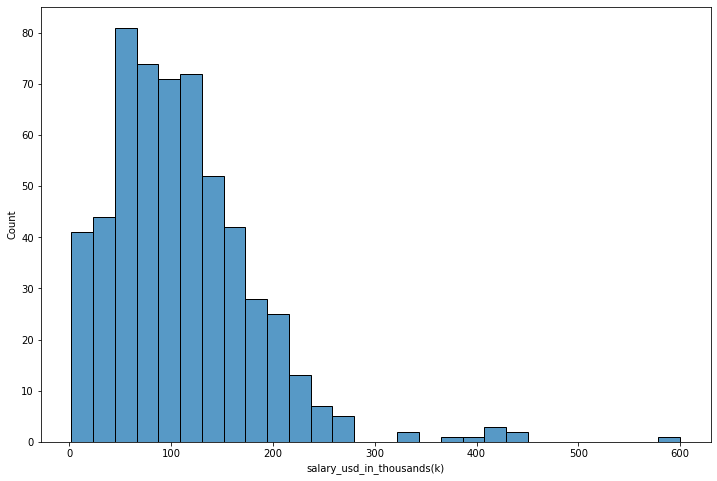

In [14]:
fig, axes = plt.subplots(figsize=(12, 8))
sns.histplot(data=data_copy, x="salary_usd_in_thousands(k)"); 

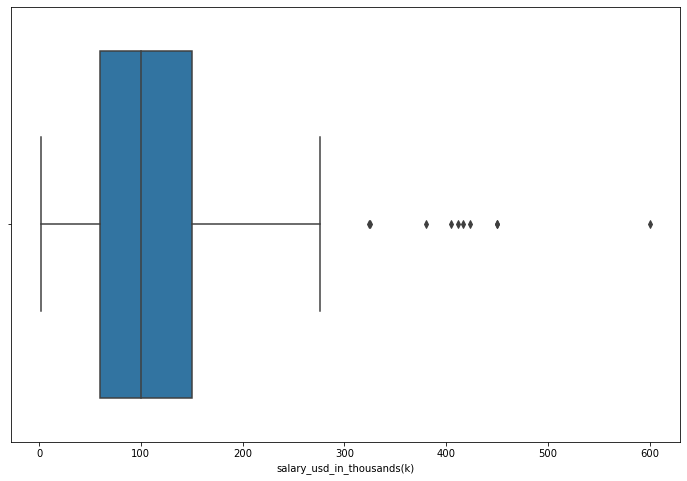

In [15]:
fig, axes = plt.subplots(figsize=(12, 8))
sns.boxplot(data=data_copy, x="salary_usd_in_thousands(k)"); 

In [16]:
def remove_outliers(data_copy):
    data_copy.drop(data_copy[data_copy["salary_usd_in_thousands(k)"]>275].index,axis=0,inplace=True)    
    return data_copy 
data_copy = remove_outliers(data_copy)

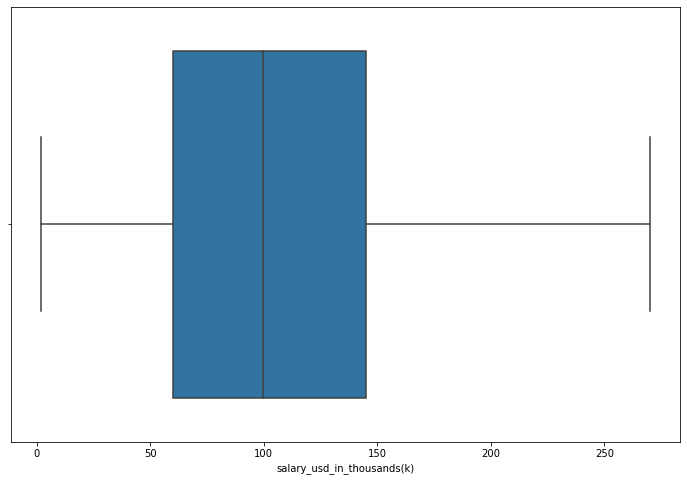

In [17]:
fig, axes = plt.subplots(figsize=(12, 8))
sns.boxplot(data=data_copy, x="salary_usd_in_thousands(k)"); 

In [18]:
data_copy['employment_type_encoded'].value_counts()

3    536
0     10
2      4
1      4
Name: employment_type_encoded, dtype: int64

In [19]:
data_copy = data_copy[data_copy['employment_type_encoded']==3]

In [20]:
# Remove work_year column, we don't want a timeseries usage and let only the Full Time contract 
data_copy = data_copy.drop(['employment_type_encoded', 'work_year', 'experience_level', 'employment_type', 'salary_currency', 'salary'], axis=1)

In [21]:
data_copy = data_copy.drop_duplicates()

In [22]:
df_info(data_copy)


        Taille du dataset : 3717
        Longueur du dataset : 531 enregistrements
        Nombre de colonnes : 7
        


,type,Echantillon,% de valeurs nulles,Nbr L dupliquées,Nbr V unique
job_title,object,"['Data Scientist', 'Machine Learning Scientist...",0.0,0,47
employee_residence,object,"['DE', 'JP', 'GB', 'HN', 'US']",0.0,0,55
remote_ratio,int64,"[0, 0, 50, 0, 50]",0.0,0,3
company_location,object,"['DE', 'JP', 'GB', 'HN', 'US']",0.0,0,49
company_size,object,"['L', 'S', 'M', 'S', 'L']",0.0,0,3
xp_encoded,int64,"[1, 2, 2, 1, 2]",0.0,0,4
salary_usd_in_thousands(k),int32,"[79, 260, 109, 20, 150]",0.0,0,184


In [23]:
data_copy['company_size_encoded'] = data_copy['company_size'].replace({'S': 0, 'M': 1, 'L': 2})
data_copy = data_copy.drop(['company_size'], axis=1)

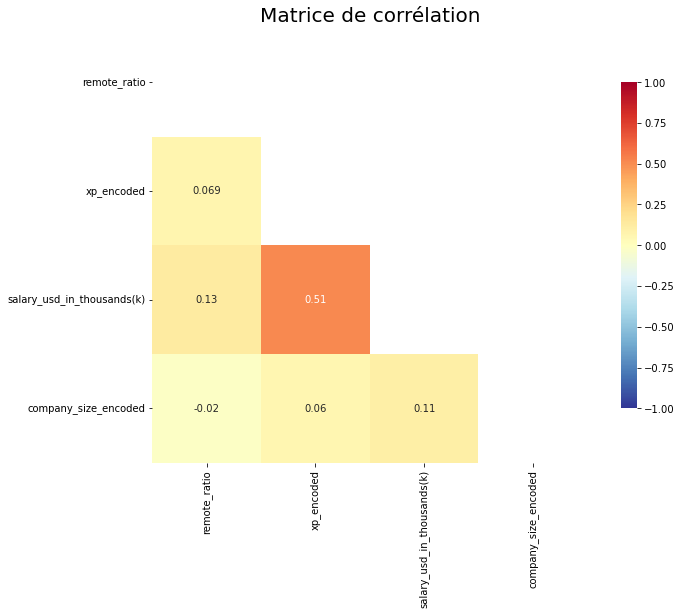

In [24]:
corr = data_copy.corr()
mask = np.triu(np.ones_like(corr, dtype=bool))
fig, axes = plt.subplots(figsize=(12, 8))
sns.heatmap(corr, mask=mask, vmin=-1,cmap='RdYlBu_r', vmax=1, square=True,
            cbar_kws={"shrink": .75}, annot=True).set_title('Matrice de corrélation', fontsize=20);

In [25]:
africa= 4
oceania = 3
america = 2
europe = 1
asia = 0

country_code = {
    'DE':europe, 'JP': america, 'GB':europe, 'HN':america, 'US':america, 'HU':europe, 'NZ':oceania, 'FR':europe, 'IN':asia, 'PK':asia, 'CN':asia,
       'GR':europe, 'AE':africa, 'NL':europe, 'MX':america, 'CA':america, 'AT':europe, 'NG':africa, 'ES':europe, 'PT':europe, 'DK':europe, 'HR':america,
       'LU':europe, 'PL':europe, 'SG':asia, 'RO': europe, 'IQ':africa, 'BR':america, 'BE':europe, 'UA':europe, 'IL':asia, 'RU':asia, 'MT':europe,
       'CL':america, 'IR':asia, 'CO':america, 'MD':europe, 'KE':africa, 'SI':europe, 'CH':asia, 'VN':asia, 'AS':oceania, 'TR':europe, 'CZ':europe,
       'IT':europe, 'EE':europe, 'MY':asia, 'AU':oceania, 'IE':europe, 'PH':asia, 'BG':europe, 'HK':asia, 'RS':europe, 'PR': america, 'JE':europe, 'AR':america, 'BO':america
}



In [26]:
data_copy['company_location_encoded'] = data_copy['company_location'].replace(country_code)
data_copy['employee_residence_encoded'] = data_copy['employee_residence'].replace(country_code)


In [27]:
data_copy['employee_residence_encoded'] = data_copy['employee_residence_encoded'].astype(dtype="int32")


In [28]:
data_copy = data_copy.drop(['company_location', 'employee_residence'], axis=1)

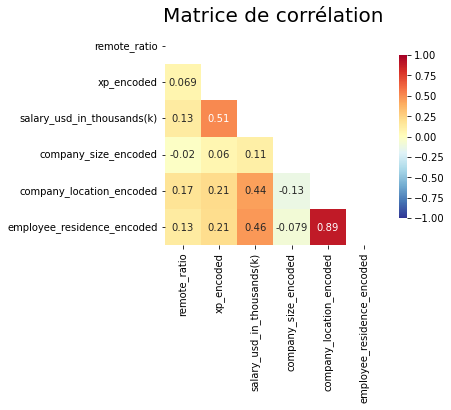

In [29]:
corr = data_copy.corr()
fig, axes = plt.subplots(figsize=(12, 8))
mask = np.triu(np.ones_like(corr, dtype=bool))
#fig, axes = plt.subplots(figsize=(12, 8))
sns.heatmap(corr, mask=mask, vmin=-1,cmap='RdYlBu_r', vmax=1, square=True,
            cbar_kws={"shrink": .75}, annot=True).set_title('Matrice de corrélation', fontsize=20);

In [30]:
data_copy = data_copy.drop(['company_location_encoded'], axis=1)
y = data_copy["salary_usd_in_thousands(k)"]
y

0       79
1      260
2      109
3       20
4      150
5       72
6      190
7       35
8      135
9      125
10      51
11      40
12      39
13      87
14      85
15       8
16      41
17     114
18       5
19      56
20      43
21       6
22      47
23      98
24     115
26      42
27      33
29     117
30      59
31      70
32      68
34      46
35      74
36     103
37     250
38      10
39     138
40      45
41      79
42      50
43     106
44     112
46      76
47     188
48     105
49      70
50       6
51      91
52      45
53      54
55     148
56      38
57     118
58     120
59     138
60     110
61     130
64      45
65      62
66      49
67     190
68     105
69      91
70      62
71      42
72      82
73     150
74     235
75      53
76     100
79      80
80      79
81     140
82      54
83      47
84     153
85      28
86      59
87     110
88     170
89      80
90      88
91      76
92      19
94      29
95      89
98      70
99      95
100     75
101    150
102     36

In [31]:
X = data_copy.drop(['job_title', "salary_usd_in_thousands(k)"], axis=1)
X

,remote_ratio,xp_encoded,company_size_encoded,employee_residence_encoded
0,0,1,2,1
1,0,2,0,2
2,50,2,1,1
3,0,1,0,2
4,50,2,2,2
5,100,0,2,2
6,100,2,0,2
7,50,1,2,1
8,100,1,2,2
9,50,2,0,3


In [32]:
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor
from sklearn.svm import SVR
from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_val_score

In [33]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42, stratify=data_copy['employee_residence_encoded'])

In [34]:
cross_val_score(LinearRegression(),X_train,y_train, cv=5).mean()

0.39791172183946155

In [35]:
lr_1 = LinearRegression()

In [36]:
lr_1.fit(X_train,y_train)

LinearRegression()

In [37]:
lr_1.coef_

array([ 0.08513454, 30.25852195,  5.98520242, 32.98131466])

In [38]:
lr_1.score(X_test,y_test)

0.37216515972458175

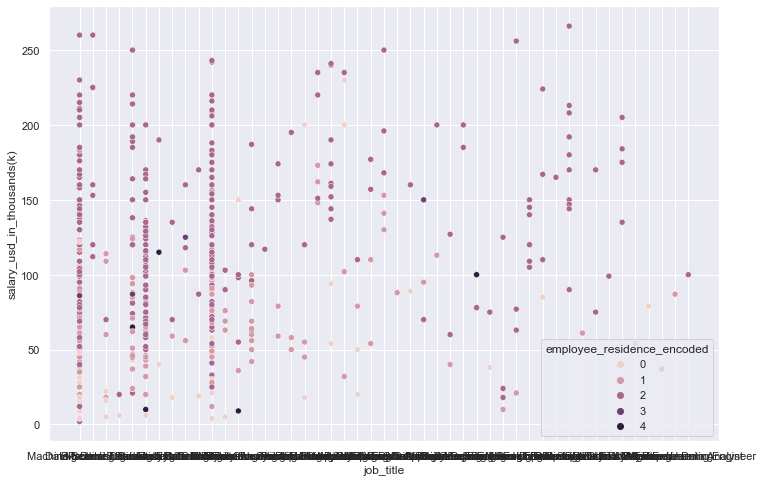

In [48]:
sns.set_theme(style="darkgrid")
fig, axes = plt.subplots(figsize=(12, 8))
g = sns.scatter(y="salary_usd_in_thousands(k)", 
               x='employee_residence_encoded', 
               data=data_copy,
               hue='employee_residence_encoded')

In [50]:
import plotly.express as px

fig = px.scatter(data_copy, y="salary_usd_in_thousands(k)", x='job_title', color='employee_residence_encoded')
fig.update_layout(width=int(1000),height=int(800))
fig.show()